In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import warnings
import math

In [2]:
files = os.popen('find ./HistEventDisplay/gamma/ -name "*"').read().split('\n')[1:-1]

In [3]:
def read_histos(directory="./HistEventDisplay/", dtype="gamma"):
    files = os.popen('find '+directory+dtype+'/ -name "*"').read().split('\n')[1:-1]

    # set up template dataframe
    #names = []
    df = pd.DataFrame()
    name_df = []
    for file in files:
        name = file[file.find("//")+2:-4]
        onedf = pd.read_csv(file, sep=" ",names=["bins", "histo", "width"])
        onedf.columns = [[name]*3, ["bins", "histo", "width"]]
        df = pd.concat([df, onedf], axis=1)
    return df

In [4]:
df = read_histos()

In [86]:
df.head(5)

size_LST              size_MSTFC             size_SSTDC              \
      bins histo  width       bins histo width       bins histo width   
0    2.000     0  0.004       2.00   0.0  0.06       2.00   0.0  0.04   
1    2.004     0  0.004       2.06   0.0  0.06       2.04   0.0  0.04   
2    2.008     0  0.004       2.12   1.0  0.06       2.08   0.0  0.04   
3    2.012     0  0.004       2.18   2.0  0.06       2.12   1.0  0.04   
4    2.016     0  0.004       2.24   4.0  0.06       2.16   1.0  0.04   

  width_LST  ...  ntubes_per_image1 ntubes_per_image2                \
       bins  ...              width              bins   histo width   
0     0.000  ...                1.0               0.0     0.0   1.0   
1     0.005  ...                1.0               1.0     0.0   1.0   
2     0.010  ...                1.0               2.0    54.0   1.0   
3     0.015  ...                1.0               3.0   124.0   1.0   
4     0.020  ...                1.0               4.0  1786.0   1.0   

  ntubes_per_image3             ntubes_per_image4              
               bins histo width              bins histo width  
0               0.0   0.0   1.0               0.0   0.0   1.0  
1               1.0   0.0   1.0               1.0   0.0   1.0  
2               2.0   0.0   1.0               2.0   0.0   1.0  
3               3.0   0.0   1.0               3.0   0.0   1.0  
4               4.0   0.0   1.0               4.0   0.0   1.0  

[5 rows x 60 columns]

In [74]:
def rebin(bins, hist, binwidth, limits=None, numbins=40, eps=0.01):
    xmin = np.min(bins)
    xmax = np.max(bins)
    if not limits:
        limits=(xmin, xmax)
    
    
    # get true startpoint
    if (limits[0] < np.min(bins)) | (limits[0] > np.max(bins)):
        raise ValueError("limits not included in range of bins")
    
    if np.any(limits[0] == bins):
        start = limits[0]
    else:
        start = np.max(bins[bins < limits[0]])
        
    reqeusted_width = (limits[1] - start) / numbins
    to_merge = math.ceil(reqeusted_width / binwidth)
    
    new_binwidth = to_merge * binwidth
    stop = new_binwidth * numbins + start
    
    if (np.max(bins + binwidth) < stop):
        raise ValueError("calculated value for stop outside of range of bins")
    
    if np.mod(reqeusted_width, binwidth) == 0.:
        pass
    else:
        # set reqeusted_width to mutiple of binwidth which is closest to desired value.
        warnings.warn("Reqeusted width of {} not possible with given binwidth."
                      " Will use closest possible value {} instead".format(
                      np.round(reqeusted_width, 5), np.round(binwidth*to_merge, 5)))
    
    new_bins = bins[bins >= start][0:to_merge*numbins:to_merge]
    #new_bins = np.append(new_bins, np.max(new_bins) + new_binwidth)
    
    _hist = hist[bins >= start][0:to_merge*numbins]
    
    new_hist = np.zeros(40)
    for i in range(to_merge):
        new_hist = np.sum([new_hist, _hist[i::to_merge]], axis=0)
    
    # adapt for plotting:
    new_bins = np.append(new_bins, np.max(new_bins) + new_binwidth)
    new_hist = np.append(new_hist[0], new_hist)
    
    return new_bins, new_hist

In [81]:
new_bins, new_hist = rebin(df["size_LST"].bins, df["size_LST"].histo, df["size_LST"].width[0], (2.0,6))

/Users/konstantinpfrang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: UserWarning: Reqeusted width of 0.1 not possible with given binwidth. Will use closest possible value 0.1 instead


In [ ]:
def plot_hist(df):
    plt.plot(df.bins, df.histo, ls="steps")
    plt.plot(new_bins, new_hist, ls="steps")
    plt.semilogy()

[]

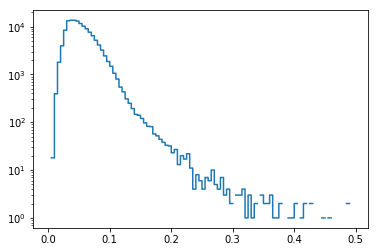

In [99]:
plt.plot(df["width_LST"].bins, df["width_LST"].histo, ls="steps")
#plt.plot(new_bins, new_hist, ls="steps")
plt.semilogy()
#plt.xlim(2.5,3.3)

(array([  4.,   7.,  12.,  13.,  15.,  19.,  14.,   5.,   6.,   5.]),
 array([-2.15573147, -1.71830049, -1.28086951, -0.84343853, -0.40600755,
         0.03142343,  0.4688544 ,  0.90628538,  1.34371636,  1.78114734,
         2.21857832]),
 <a list of 1 Patch objects>)

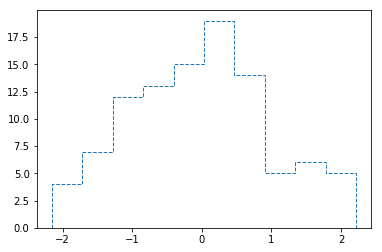

In [98]:
plt.hist(np.random.normal(0,1,100), histtype="step", ls="--")

In [115]:
a = df["size_LST"]
a.empty

False

In [124]:
integrator="NeighbourPeakIntegrator"
file = "hillas_gamma_20deg_180deg_run893_NeighbourPeakIntegrator_NullWaveformCleaner.h5"
file

'hillas_gamma_20deg_180deg_run893_NeighbourPeakIntegrator_NullWaveformCleaner.h5'

In [126]:
file[file.find("_run")+4:file.find(integrator)-1]

'893'

In [87]:
def print_stat_error(bins, value, linewidth=3, color=None):
    error = 1 / np.sqrt(a)
    error[~np.isfinite(err)] = 0
    position = np.mean([b[:-1],b[1:]], axis=0)
    plt.errorbar(position, value, yerr=error, fmt=' ', linewidth=linewidth, color=color)

13


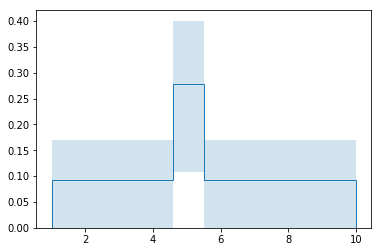

In [330]:
def get_norm_factor(values):
    norm = np.sum(values) * ((len(values) -1) / len(values))
    print(np.sum(values))
    return norm

def print_stat_error(bins, value, color=None, alpha=1, add=True, normed=False):
    '''
    input
    -----
    bins - position of bins
    value - values of unbinned histogram
    '''
    if add:
        value = np.append(value, value[-1])
    error = np.sqrt(value)
    if normed:
        norm = get_norm_factor(value)
        error = error / norm
        value = value / norm
    plt.fill_between(x=bins, y1=value+error, y2=value-error, step="post", alpha=alpha, color=color)
    
a,b,c = plt.hist([1,2,3,4,5,5,5,6,7,8,9,10], histtype="step", normed=True)
a1, b1 = np.histogram([1,2,3,4,5,5,5,6,7,8,9,10])

print_stat_error(b1, a1, normed=True, color=None, alpha=0.2)

In [368]:
hist = [0,2,0]
bins = [0,1,1]

In [380]:
max(df.coreX/100)

1801.5962500000001

In [392]:
np.arange()

TypeError: unsupported operand type(s) for -: 'NoneType' and 'int'

In [439]:
def MtoDEG(df):
	focal_length_tels = {
	"LSTCam": 28.,
	"FlashCam": 16,
	"NectarCam": 16,
	"ASTRICam": 2.15,
	"DigiCam": 5.6,
	"CHEC": 2.283,
	}
	df["mtodeg"] = -100
	for cam in np.unique(df["camera"]):
		conversion = (180 / (np.pi * focal_length_tels[cam]))
		df.loc[df.camera==cam, "mtodeg"] = conversion

	return df
MARS = MtoDEG(df)

In [443]:
MARS

,telID,size,length,width,numUsedPix,Etrue,coreX,coreY,camera,coredist,mtodeg
0,37,112.055,62.426,36.654,12.0,158.465,68993.914,-7063.191,FlashCam,69354.515615,3.580986
1,43,149.109,65.453,29.054,12.0,158.465,68993.914,-7063.191,FlashCam,69354.515615,3.580986
2,49,215.109,61.872,22.164,12.0,158.465,68993.914,-7063.191,FlashCam,69354.515615,3.580986
3,78,100.734,64.775,27.315,12.0,158.465,68993.914,-7063.191,NectarCam,69354.515615,3.580986
4,84,148.164,218.999,26.199,16.0,158.465,68993.914,-7063.191,NectarCam,69354.515615,3.580986
5,90,230.438,57.170,21.082,13.0,158.465,68993.914,-7063.191,NectarCam,69354.515615,3.580986
6,480,0.000,-1.000,-1.000,-1.0,158.465,68993.914,-7063.191,DigiCam,69354.515615,10.231389
7,1,263.875,148.915,35.742,36.0,224.822,-19327.477,2843.384,LSTCam,19535.511249,2.046278
8,2,735.367,93.486,32.348,33.0,224.822,-19327.477,2843.384,LSTCam,19535.511249,2.046278
9,3,631.484,110.393,38.402,42.0,224.822,-19327.477,2843.384,LSTCam,19535.511249,2.046278


(array([  1.41351000e+05,   2.89575000e+05,   2.36359000e+05,
          1.36319000e+05,   8.94950000e+04,   7.08730000e+04,
          3.55400000e+04,   1.28570000e+04,   6.10300000e+03,
          3.73200000e+03,   2.97700000e+03,   2.63700000e+03,
          2.32300000e+03,   2.10400000e+03,   1.77400000e+03,
          1.51300000e+03,   1.34500000e+03,   1.04300000e+03,
          8.81000000e+02,   6.76000000e+02,   4.61000000e+02,
          3.58000000e+02,   2.40000000e+02,   1.88000000e+02,
          1.12000000e+02,   9.50000000e+01,   4.90000000e+01,
          4.30000000e+01,   3.00000000e+01,   1.70000000e+01,
          1.60000000e+01,   1.20000000e+01,   9.00000000e+00,
          4.00000000e+00,   3.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          2.00000000e+00]),
 array([-0.02509671,  0.09458535,  0.2142674 ,  0.33394945,  0.4536315 ,
         0.57331355,  0.6929956 ,  0.81267765,  0.93235971,  1.05204176,
         1.17172381,

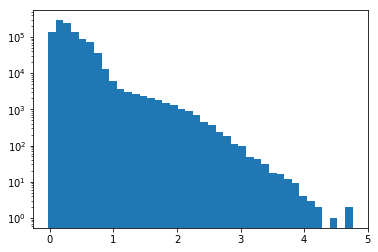

In [442]:
length = MARS.length * MARS.mtodeg / 1000
plt.hist(length, log=True, bins=40 )

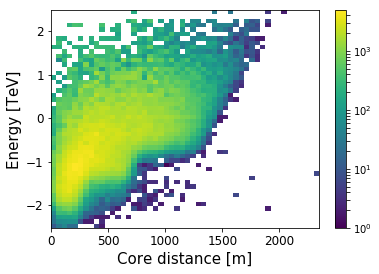

In [432]:
from matplotlib.colors import LogNorm
plt.hist2d(df["coredist"]/100, np.log10(df.Etrue/1000), bins=50, cmap="viridis", norm=LogNorm())
plt.colorbar()
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel("Core distance [m]", fontsize=15)
plt.ylabel("Energy [TeV]", fontsize=15)
plt.show()

In [125]:
a

array([  8.52773000e+05,   1.70329000e+05,   8.55700000e+03,
         3.57200000e+03,   2.95800000e+03,   1.87200000e+03,
         7.76000000e+02,   2.23000000e+02,   5.30000000e+01,
         6.00000000e+00])

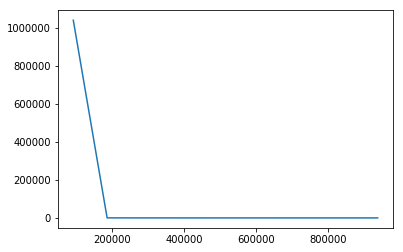

In [99]:
plt.plot(b[1:],a)

In [21]:
df = pd.read_csv("MARS/tuple_0.txt", sep=";", header=0)

In [29]:
df = pd.read_csv("MARS/tuple_0.txt", sep=";", header=0)
df.telID = df.telID.astype(int)
df["camera"] = [tel_list[x] for x in df.telID]

In [15]:
df = pd.read_csv("./ctapipe_charge.csv", sep=",", header=0, index_col=0)

/Users/konstantinpfrang/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [18]:
import pickle
with open('tel_list.pickle', 'rb') as handle:
    tel_list = pickle.load(handle)

In [19]:
tel_list

{1: 'LSTCam',
 2: 'LSTCam',
 3: 'LSTCam',
 4: 'LSTCam',
 5: 'LSTCam',
 6: 'LSTCam',
 7: 'LSTCam',
 8: 'LSTCam',
 9: 'LSTCam',
 10: 'LSTCam',
 11: 'LSTCam',
 12: 'FlashCam',
 13: 'FlashCam',
 14: 'FlashCam',
 15: 'FlashCam',
 16: 'FlashCam',
 17: 'FlashCam',
 18: 'FlashCam',
 19: 'FlashCam',
 20: 'FlashCam',
 21: 'FlashCam',
 22: 'FlashCam',
 23: 'FlashCam',
 24: 'FlashCam',
 25: 'FlashCam',
 26: 'FlashCam',
 27: 'FlashCam',
 28: 'FlashCam',
 29: 'FlashCam',
 30: 'FlashCam',
 31: 'FlashCam',
 32: 'FlashCam',
 33: 'FlashCam',
 34: 'FlashCam',
 35: 'FlashCam',
 36: 'FlashCam',
 37: 'FlashCam',
 38: 'FlashCam',
 39: 'FlashCam',
 40: 'FlashCam',
 41: 'FlashCam',
 42: 'FlashCam',
 43: 'FlashCam',
 44: 'FlashCam',
 45: 'FlashCam',
 46: 'FlashCam',
 47: 'FlashCam',
 48: 'FlashCam',
 49: 'FlashCam',
 50: 'FlashCam',
 51: 'FlashCam',
 52: 'FlashCam',
 53: 'NectarCam',
 54: 'NectarCam',
 55: 'NectarCam',
 56: 'NectarCam',
 57: 'NectarCam',
 58: 'NectarCam',
 59: 'NectarCam',
 60: 'NectarCam',
 61